# 统计学：决策的科学项目说明
## 背景信息
在一个 Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

## 调查问题
作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

### 我们的自变量是什么？因变量是什么？
- 自变量：congruent(一致任务), incongruent（不一致任务）
- 因变量：time(完成任务的时间)

### 此任务的适当假设集是什么？你想执行什么类型的统计测试？为你的选择提供正当理由。

- 零假设：在总体中，一致任务情况下完成的时间大于等于不一致任务情况下完成的时间。
- 对立假设：在总体中， 一致任务情况下完成的时间小于不一致任务情况下完成的时间。

- 一致任务时，总体中完成任务的平均时间是：$t_1$
- 不一致任务时，总体中完成任务的平均时间是：$t_2$
- 零假设$H_0$：$t_1-t_2≥0$
- 对立假设$H_1$：$t_1-t_2<0$

- **执行的验证**：执行统计学中的假设检验中的成对的 $t$ 验证。
- **原因**：因为此实验针对一个对象，观察改变任务性质前后的变化。

### 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。


In [1]:
# importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading data
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
# print the descriptive statistics
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


#### 数据集的集中性测量：

| |Congruent|Congruent|
|-|-|-|
|平均数|14.05|22.02|
|中位数|14.37|21.02|

In [4]:
IQR_con = df.describe()['Congruent']['75%']-df.describe()['Congruent']['25%']
IQR_incon = df.describe()['Incongruent']['75%']-df.describe()['Incongruent']['25%']
IQR_con,IQR_incon

(4.3054999999999986, 5.33475)

#### 数据集的变异性测量：
| |Congruent|Congruent|
|-|-|-|
|标准方差|3.56|4.80|
|四分位差|4.31|5.33|

### 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

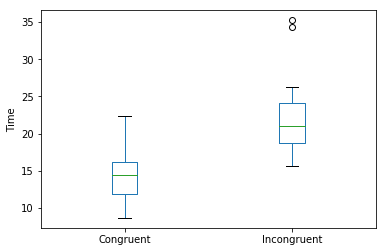

In [5]:
df[['Congruent','Incongruent']].plot(kind = 'box');
plt.ylabel('Time');

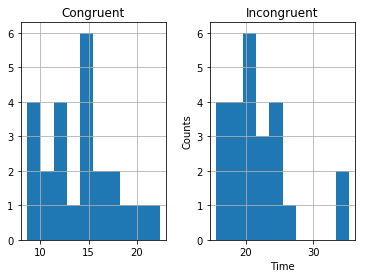

In [6]:
df[['Congruent','Incongruent']].hist();
plt.xlabel('Time');
plt.ylabel('Counts');

**结合上面箱线图和直方图**，可以看出Congruent(任务一致性)的数据无异常值，Incongruent(任务不一致性)的数据有异常值。图片上呈现的异常值，不是决定异常，也具有相对合理性，决定保留这两个点。

### 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [7]:
#caculate the sample diff time
df['diff_time'] = df['Congruent']-df['Incongruent']

#sampling 100000 times from diff_time sample by bootstrapping. 
#And then caculate sample mean of each sample, append it to diff_mean_list
diff_mean_list = []
for _ in range(100000):
    s = df['diff_time'].sample(24, replace = True)
    mean = s.mean()
    diff_mean_list.append(mean)
    
# diff_mean_list is the list of every sample mean

#### 计算置信区间

In [8]:
diff_mean_list = np.array(diff_mean_list)
lower = np.percentile(diff_mean_list,2.5)
upper = np.percentile(diff_mean_list,97.5)
lower, upper

(-9.960833333333333, -6.157666666666667)

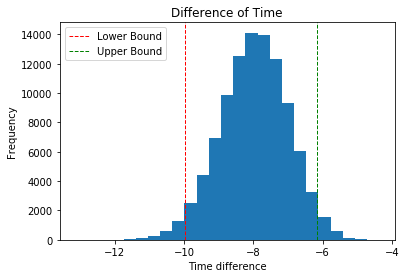

In [9]:
plt.hist(diff_mean_list, bins=25)
plt.title('Difference of Time')
plt.xlabel('Time difference')
plt.ylabel('Frequency')
plt.axvline(x=lower, color='r', linestyle='dashed', linewidth=1, label="Lower Bound")
plt.axvline(x=upper, color='g', linestyle='dashed', linewidth=1, label="Upper Bound")
plt.legend()
plt.show()

- 计算diff_mean_list的2.5%位和97.5%位的值，分别是-9.94, -6.16
- 可得出结论，当置信度为95%时，$t_1-t_2$值在-9.94到-6.16的范围内。如上图
- 由此我们可以得出，我们拒绝零假设，一致任务情况下完成的时间小于不一致任务情况下完成的时间。

#### 用正态分布模拟零假设的值，来计算P值

In [10]:
# caculate the std of the diff_mean_list
diff_mean_std = np.std(diff_mean_list)
diff_mean_std

0.9722571672934144

In [11]:
#simulate the distribution of t1-t2 mean under null hypothesis
null_val = np.random.normal(loc=0,scale=0.967,size = 100000)

In [12]:
#caculate the mean of time_diff sample
mean_s = df['diff_time'].mean()

In [14]:
#compare the null_val with mean_s, and caculate the p_value
p_val = (null_val < mean_s).mean()
p_val

0.0

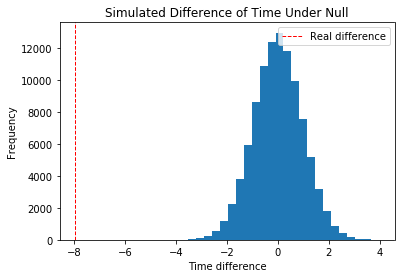

In [16]:
# Plot histogram
plt.hist(null_val, bins=25)
plt.title('Simulated Difference of Time Under Null')
plt.xlabel('Time difference')
plt.ylabel('Frequency')
plt.axvline(x=mean_s, color='r', linestyle='dashed', linewidth=1, label="Real difference")
plt.legend()
plt.show()

- 用正态分布模拟零假设为真情况的时间差平均值，其中μ=0， σ=0.967, 得到null_val
- 计算我们当前样本的$t_1-t_2$差的平均值，其值为-7.96.
- 正态分布得到值与样本的时间差的平均值比较，计算P值，P值为0，如上图
- 可以得出结论：样本来自零假设可能性很小，拒绝零假设，一致任务情况下完成的时间小于不一致任务情况下完成的时间。

### 可选：你觉得导致所观察到的效应的原因是什么？你是否能想到会取得类似效应的替代或类似任务？进行一些调查研究将有助于你思考这两个问题！
- **原因**：我们对于两个刺激反映速度不同，这个实验中我们对文字刺激反映速度更快，但对颜色刺激反映速度相对慢，但是任务是我们要说出看到的颜色。
- **类似任务**：对母语和第二语言的刺激，提供同时有母语和第二语言的卡牌，任务是要求根据第二语言来从提供的四张图片中选择正确解释的图片。
